<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DS_422_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving quickdraw10.npz to quickdraw10.npz


In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
def load_quickdraw10(path = "quickdraw10.npz"):
  """
  Takes a path for the quickdraw data sample and standardizes
  Returns: X_train, X_test, Y-train, y_test
  """
  data = np.load(path)
  X = data["arr_0"].astype("float32")/255
  y = data["arr_1"]

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)  

  return X_train, y_train, X_test, y_test

In [4]:
X_train, y_train, X_test, y_test = load_quickdraw10()

In [5]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
print(X_train.shape)
print(y_train.shape)

(75000, 784)
(75000,)


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
##### Your Code Here #####

def create_model(lr = .001, loss = "sparse_categorical_crossentropy"):
  model = Sequential()
  optimizer = Adam(learning_rate= lr)

  # Two hidden layers and output
  model.add(Dense(75, activation = "relu", input_dim = 784))
  model.add(Dense(50, activation = "relu"))

  model.add(Dense(10, activation = "softmax"))

  model.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])
  
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [14]:
batch_sizes = [16, 32, 64, 128, 256]

callback = EarlyStopping(monitor = "val_accuracy", min_delta = 0.002, patience = 3, verbose = 0, mode = "max", restore_best_weights = False)

batch_models = []

for batch in batch_sizes:
  model = create_model()
  bt_model = model.fit(X_train, y_train, epochs = 50, batch_size = batch, callbacks = [callback], validation_data = (X_test, y_test), verbose=0)
  batch_models.append(bt_model)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
all_models = []

for model, size in zip(batch_models, batch_sizes):
  df = pd.DataFrame.from_dict(model.history)
  df["epoch"] = df.index.values
  df["Batch Size"] = size
  all_models.append(df)

df = pd.concat(all_models)
df["Batch Size"] = df["Batch Size"].astype("str")
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.665477,0.798093,0.522535,0.84244,0,16
1,0.487031,0.853960,0.489538,0.85316,1,16
2,0.434849,0.868440,0.468580,0.85884,2,16
3,0.399126,0.879160,0.457835,0.86256,3,16
4,0.369926,0.888133,0.473543,0.86240,4,16


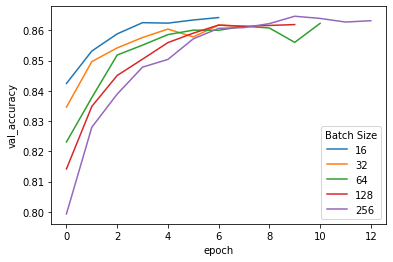

In [17]:
sns.lineplot(x="epoch", y = "val_accuracy", hue= "Batch Size", data = df);

In [ ]:
sns.lineplot(x="epoch", y = "val_loss", hue= "Batch Size", data = df);

In [18]:
df.shape

(49, 6)

In [19]:
df

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.665477,0.798093,0.522535,0.84244,0,16
1,0.487031,0.853960,0.489538,0.85316,1,16
2,0.434849,0.868440,0.468580,0.85884,2,16
3,0.399126,0.879160,0.457835,0.86256,3,16
4,0.369926,0.888133,0.473543,0.86240,4,16
5,0.346316,0.893840,0.471220,0.86344,5,16
6,0.328601,0.900253,0.466987,0.86424,6,16
0,0.701311,0.788547,0.544889,0.83464,0,32
1,0.509330,0.847760,0.505087,0.84968,1,32
2,0.447372,0.865573,0.476236,0.85420,2,32


The 16 batch size seems to perform best even with a very strict early stopping metric. Least epochs and reaches top accuracy quickest. 256 starts slow but needs more iterations to approach that value. Sticking with 16. I thought the default 32 would perform better than it did

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [32]:
learning_rates = [1, .1, .01, .001, .0001]

# Was gonna leave the callback as is for consistency but changed my mind after the first pass
callback = EarlyStopping(monitor = "val_accuracy", min_delta = 0.003, patience = 4, verbose = 0, mode = "max", restore_best_weights = False, baseline = 0.8)

learning_models = []

for lr in learning_rates:
  model = create_model(lr = lr)
  # Use 16 batch size
  bt_model = model.fit(X_train, y_train, epochs = 50, batch_size = 16, callbacks = [callback], validation_data = (X_test, y_test), verbose=0)
  learning_models.append(bt_model)

In [35]:
all_lr_models = []

for model, lr in zip(learning_models, learning_rates):
  df = pd.DataFrame.from_dict(model.history)
  df["epoch"] = df.index.values
  df["Learning Rate"] = lr
  all_lr_models.append(df)

df_lr = pd.concat(all_lr_models)
df_lr["Learning Rate"] = df_lr["Learning Rate"].astype("str")
df_lr.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,13.182900,0.098200,2.386091,0.10212,0,1.0
1,2.465113,0.101333,2.452698,0.10024,1,1.0
2,2.471014,0.098547,2.391510,0.09932,2,1.0
3,2.466928,0.100080,2.498068,0.10068,3,1.0
0,2.310609,0.113027,2.326236,0.10024,0,0.1


In [36]:
df_lr

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,13.182900,0.098200,2.386091,0.10212,0,1.0
1,2.465113,0.101333,2.452698,0.10024,1,1.0
2,2.471014,0.098547,2.391510,0.09932,2,1.0
3,2.466928,0.100080,2.498068,0.10068,3,1.0
0,2.310609,0.113027,2.326236,0.10024,0,0.1
1,2.321036,0.100533,2.320366,0.10024,1,0.1
2,2.320573,0.100907,2.317448,0.09916,2,0.1
3,2.321397,0.097800,2.316801,0.09916,3,0.1
0,0.777879,0.766707,0.696466,0.79832,0,0.01
1,0.661165,0.806880,0.683258,0.80148,1,0.01


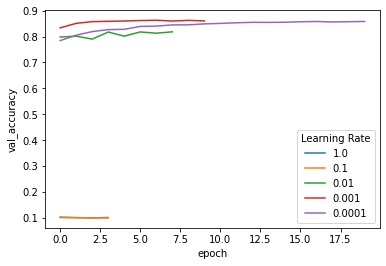

In [37]:
sns.lineplot(x="epoch", y = "val_accuracy", hue= "Learning Rate", data = df_lr);

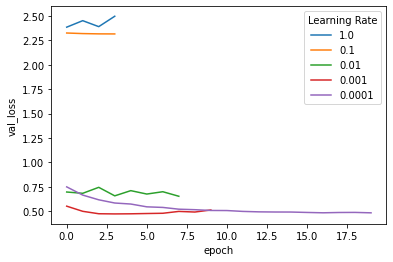

In [38]:
sns.lineplot(x="epoch", y = "val_loss", hue= "Learning Rate", data = df_lr);

The default 0.001 is still perfect as expected as all these optimizers are adaptive in the sense that they adjust the learning rate under the hood as they progress through fitting. So sticking with the default in most cases would be just fine

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [39]:
def create_model(optimizer, loss = "sparse_categorical_crossentropy"):
  model = Sequential()
  

  # Two hidden layers and output
  model.add(Dense(75, activation = "relu", input_dim = 784))
  model.add(Dense(50, activation = "relu"))

  model.add(Dense(10, activation = "softmax"))

  model.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])
  
  return model

In [40]:
optimizers = [Adadelta(), Adagrad(), Adam(), RMSprop(), SGD()]

# Revert to first callback with default Adam
callback = EarlyStopping(monitor = "val_accuracy", min_delta = 0.002, patience = 3, verbose = 0, mode = "max", restore_best_weights = False)

optimizer_models = []

for optimizer in optimizers:
  model = create_model(optimizer)
  optimizer_model = model.fit(X_train, y_train, epochs = 50, batch_size = 16, callbacks = [callback], validation_data = (X_test, y_test), verbose=0)
  optimizer_models.append(optimizer_model)

In [41]:
all_opt_models = []

for model, opt in zip(optimizer_models, optimizers):
  df = pd.DataFrame.from_dict(model.history)
  df["epoch"] = df.index.values
  df["Optimizer"] = str(opt).split(".")[4].capitalize()
  all_opt_models.append(df)

df_opts = pd.concat(all_opt_models)
df_opts.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,2.334022,0.119680,2.282194,0.13364,0,Adadelta
1,2.238673,0.153147,2.199636,0.17052,1,Adadelta
2,2.155538,0.204187,2.114362,0.23704,2,Adadelta
3,2.065890,0.273133,2.021152,0.30140,3,Adadelta
4,1.968984,0.333373,1.921946,0.35596,4,Adadelta


In [46]:
pd.set_option('display.max_rows', None)
df_opts

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,2.334022,0.119680,2.282194,0.13364,0,Adadelta
1,2.238673,0.153147,2.199636,0.17052,1,Adadelta
2,2.155538,0.204187,2.114362,0.23704,2,Adadelta
3,2.065890,0.273133,2.021152,0.30140,3,Adadelta
4,1.968984,0.333373,1.921946,0.35596,4,Adadelta
5,1.868513,0.393867,1.821241,0.41676,5,Adadelta
6,1.768846,0.450000,1.723739,0.47520,6,Adadelta
7,1.674533,0.499307,1.633125,0.51544,7,Adadelta
8,1.588570,0.534600,1.551950,0.54592,8,Adadelta
9,1.512532,0.559587,1.480812,0.56612,9,Adadelta


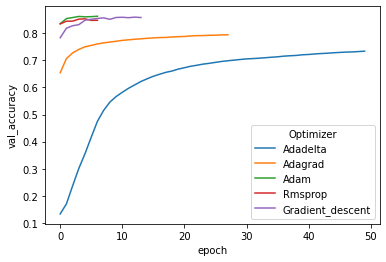

In [42]:
sns.lineplot(x="epoch", y = "val_accuracy", hue= "Optimizer", data = df_opts);

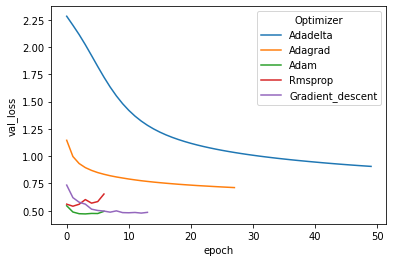

In [43]:
sns.lineplot(x="epoch", y = "val_loss", hue= "Optimizer", data = df_opts);

I did not expect Adadelta to perform so terribly. It seems it'll still get where it wants to go but with a lot more iteration. Best models seem to be Adam, then SGD, then RMSprop. One interesting thing I'd do in the future is considering restoring best weights in the callback

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
I understand backpropagation as the process of taking the loss of a model to imporve the model. The model makes the first pass and kinda "sees" what went wrong, passes everything back, then runs/fits again.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


